<a href="https://colab.research.google.com/github/Neha609/Machine-Learning-Projects/blob/gh-pages/Housing%20Price%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



## **Project 01: California Housing Price Prediction**

You don't need to limit yourself to the number of rows/cells provided. You can add additional rows in each section to add more lines of code.

**Happy coding!**

# Import Libraries

In [ ]:
#Import the required libraries
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

#For Ploting Graph
import matplotlib.pyplot as plt

# Load The Data

In [ ]:
#Read the Housing Data
Dt_Housing = pd.read_csv('housing.csv')

In [ ]:
#View first Few Records
Dt_Housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [ ]:
#Extract input(X) and output (Y) data from the dataset
Feature_cols = ['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population',
                'households','median_income','ocean_proximity']
X = Dt_Housing[Feature_cols]
Y = Dt_Housing.median_house_value

In [ ]:
#View first five Featured Data
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY


In [ ]:
#View first five  Response
Y.head()

0    452600
1    358500
2    352100
3    341300
4    342200
Name: median_house_value, dtype: int64

In [ ]:
#View the Featured Data
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY


In [ ]:
#View the shape of Featured Data
X.shape

(20640, 9)

# Handle missing values

In [ ]:
#Finding the mean of the Housing Data
Dt_Housing.mean()

longitude               -119.569704
latitude                  35.631861
housing_median_age        28.639486
total_rooms             2635.763081
total_bedrooms           537.870553
population              1425.476744
households               499.539680
median_income              3.870671
median_house_value    206855.816909
dtype: float64

In [ ]:
#Fill the missing values with "mean" of the respective columns
Dt_Housing.fillna(Dt_Housing.mean())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
5,-122.25,37.85,52,919,213.0,413,193,4.0368,NEAR BAY,269700
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,NEAR BAY,299200
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,NEAR BAY,241400
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,NEAR BAY,226700
9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,NEAR BAY,261100


In [ ]:
from sklearn.preprocessing import Imputer
missingValueImputer = Imputer (missing_values = 'NaN', strategy = 'mean', axis = 0)
X.iloc[:,0:8] = missingValueImputer.fit_transform(X.iloc[:,0:8])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [ ]:
#Cateogorical Column Count 
Dt_Housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

# Encode categorical data

In [ ]:
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#le = LabelEncoder()
#X['ocean_proximity'] = le.fit_transform(X['ocean_proximity'])

In [ ]:
#Convert Categorical column in the dataset to numerical data

X_labelencoder = LabelEncoder()
X.iloc[:,-1] = X_labelencoder.fit_transform(X.iloc[:,-1])
X.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,3


In [ ]:
from sklearn.preprocessing import OneHotEncoder
X_onehotencoder = OneHotEncoder (categorical_features = [8])
X = X_onehotencoder.fit_transform(X).toarray()

# Split the dataset

In [ ]:
#Split the data into 80% training dataset and 20% test dataset.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2,random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16512, 13)
(4128, 13)
(16512,)
(4128,)


# Standardize data

In [ ]:
#Standardize training and test datasets.

from sklearn.preprocessing import StandardScaler
independent_scalar = StandardScaler()

X_train = independent_scalar.fit_transform (X_train) 
X_test = independent_scalar.fit_transform (X_test)  

# Perform Linear Regression

In [ ]:
#Perform Linear Regression on training data.

from sklearn.linear_model import LinearRegression
LinReg = LinearRegression()
LinReg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [ ]:
#Predict output for test dataset using the fitted model.
y_pred = LinReg.predict(X_test)

In [ ]:
#Print root mean squared error (RMSE) from Linear Regression.
from sklearn.metrics import mean_squared_error
from math import sqrt

RMSE = sqrt(mean_squared_error(y_test, y_pred))
print(RMSE)

44865690760184.72


# Perform Decision Tree Regression

In [ ]:
#Perform Decision Tree Regression on training data.

from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=8, random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [ ]:
#Predict output for test dataset using the fitted model.
y_pred2 = tree_reg.predict(X_test)

In [ ]:
##Print root mean squared error (RMSE).
from sklearn.metrics import mean_squared_error
from math import sqrt

RMSE2 = sqrt(mean_squared_error(y_test, y_pred2))
print(RMSE2)

62760.75106386041


# Perform Random Forest Regression

In [ ]:
#Perform Random Forest Regression on training data.

from sklearn.ensemble import RandomForestRegressor
RFregressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
RFregressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [ ]:
#Predict output for test dataset using the fitted model.
y_pred3 = RFregressor.predict(X_test)

In [ ]:
#Print RMSE (root mean squared error) from Random Forest Regression..
from sklearn.metrics import mean_squared_error
from math import sqrt

RMSE3 = sqrt(mean_squared_error(y_test, y_pred3))
print(RMSE3)

53018.24453489866


# Perform Linear Regression with one independent variable

In [ ]:
#Extract just the median_income column from the independent variables (from X_train).
X_train
MI_train = X_train[:,7].reshape(-1,1)
MI_train

array([[ 1.85890297],
       [ 1.06434823],
       [-1.0014941 ],
       ...,
       [ 1.06434823],
       [-1.47822694],
       [ 0.50815991]])

In [ ]:
#Extract just the median_income column from the independent variables (from X_test).
X_test
MI_test = X_test[:,7].reshape(-1,1)
MI_test

array([[ 0.81226638],
       [ 0.65331708],
       [ 1.36858896],
       ...,
       [-0.22090411],
       [ 1.05069034],
       [ 1.84543688]])

In [ ]:
#Instantiate ,fit and print the intercept and coeff for Train data
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(MI_train, y_train)

print(lm.intercept_)
print(lm.coef_)

207735.06419573643
[12224.67924719]


In [ ]:
#Predict the output for train dataset using the fitted model
y_pred0 = lm.predict(MI_train)

In [ ]:
#Instantiate ,fit and print the intercept and coeff for Test data
lm1 = LinearRegression()
lm1.fit(MI_test, y_test)

print(lm1.intercept_)
print(lm1.coef_)

203338.8277616279
[12092.04737839]


In [ ]:
#Predict the output for test dataset using the fitted model
y_pred1 = lm1.predict(MI_test)

# Plot the fitted model

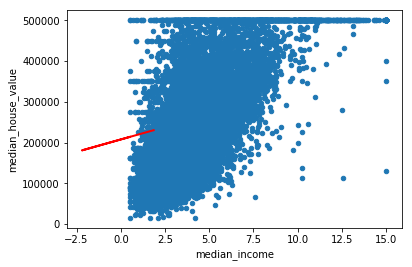

In [ ]:
# first, plot the observed data
Dt_Housing.plot(kind='scatter', x='median_income', y='median_house_value')

# then, plot the least squares line
plt.plot(MI_train, y_pred0, c='red', linewidth=2)

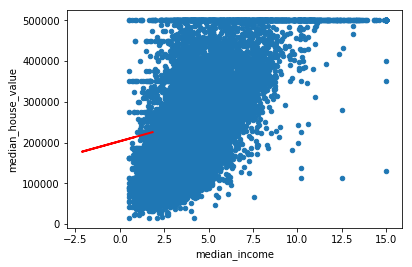

In [ ]:
# first, plot the observed data
Dt_Housing.plot(kind='scatter', x='median_income', y='median_house_value')

# then, plot the least squares line
plt.plot(MI_test, y_pred1, c='red', linewidth=2)